# A Multiclass Classification Example
## Setup Jupyter, Conda...
```
$ conda create --name reuters # Crear un env, similar a un gemset de Ruby
$ conda activate reuters
$ source activate reuters
$ conda install ipykernel # Para que Jupyter reconozco el env de Conda
$ conda install keras
$ jupyter notebook
```

## Loading the Reuters dataset

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.
/Users/carmelo.cuenca/anaconda3/envs/reuters/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


2113536/2110848 [==============================] - 2s 1us/step


## Mapping integer indices to words

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 1s 2us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
## Preparing the data

In [18]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [9]:
## Building the network

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid')) # To be a probability

## Compiling the model

In [22]:
from keras import optimizers
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy', # binary or categorical
             metrics=['accuracy'])


## Configuring the model using custom losses and metrics

```
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
```

## Setting aside a validation set

In [24]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Training the model

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.0929 - acc: 0.9585 - val_loss: 1.2911 - val_acc: 0.7890
Epoch 2/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.0959 - acc: 0.9575 - val_loss: 1.2880 - val_acc: 0.7800
Epoch 3/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.0915 - acc: 0.9588 - val_loss: 1.2491 - val_acc: 0.7930
Epoch 4/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.0878 - acc: 0.9582 - val_loss: 1.2771 - val_acc: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.0914 - acc: 0.9602 - val_loss: 1.2741 - val_acc: 0.7870
Epoch 6/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.0892 - acc: 0.9608 - val_loss: 1.2678 - val_acc: 0.7920
Epoch 7/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.0865 - acc: 0.9590 - val_loss: 1.2647 - val_acc: 0.7900


## Plotting the training and validation loss

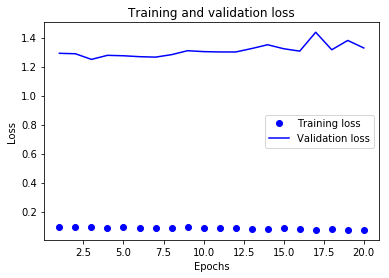

In [34]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plotting the training and validation accuracy

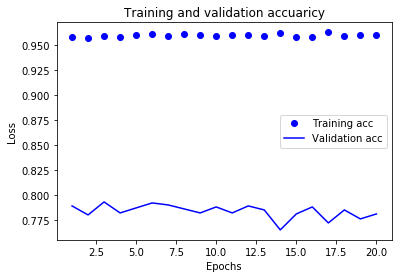

In [35]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuaricy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 138us/step


[1.5140970078092117, 0.77916295636687449]